<a href="https://colab.research.google.com/github/Akkki28/SparseMax-Transformers/blob/main/Positional_Encodings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import math

In [2]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, seq_len=5000):
        super().__init__()
        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe, persistent=False)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

In [3]:
encod_block = PositionalEncoding(d_model=50, seq_len=100)
pe = encod_block.pe.squeeze().T.cpu().numpy()

In [4]:
pe[0]

array([ 0.        ,  0.84147096,  0.9092974 ,  0.14112   , -0.7568025 ,
       -0.9589243 , -0.2794155 ,  0.6569866 ,  0.98935825,  0.4121185 ,
       -0.5440211 , -0.9999902 , -0.53657293,  0.42016703,  0.9906074 ,
        0.65028787, -0.2879033 , -0.96139747, -0.75098723,  0.1498772 ,
        0.9129453 ,  0.8366556 , -0.00885131, -0.8462204 , -0.9055784 ,
       -0.13235176,  0.76255846,  0.95637596,  0.2709058 , -0.6636339 ,
       -0.9880316 , -0.40403765,  0.5514267 ,  0.99991184,  0.5290827 ,
       -0.42818266, -0.99177885, -0.6435381 ,  0.29636857,  0.96379536,
        0.74511313, -0.15862267, -0.91652155, -0.8317747 ,  0.01770193,
        0.8509035 ,  0.90178835,  0.12357312, -0.76825464, -0.95375264,
       -0.26237485,  0.6702292 ,  0.9866276 ,  0.39592516, -0.5587891 ,
       -0.99975514, -0.521551  ,  0.43616477,  0.99287266,  0.636738  ,
       -0.3048106 , -0.9661178 , -0.7391807 ,  0.1673557 ,  0.92002606,
        0.82682866, -0.02655115, -0.85551995, -0.8979277 , -0.11

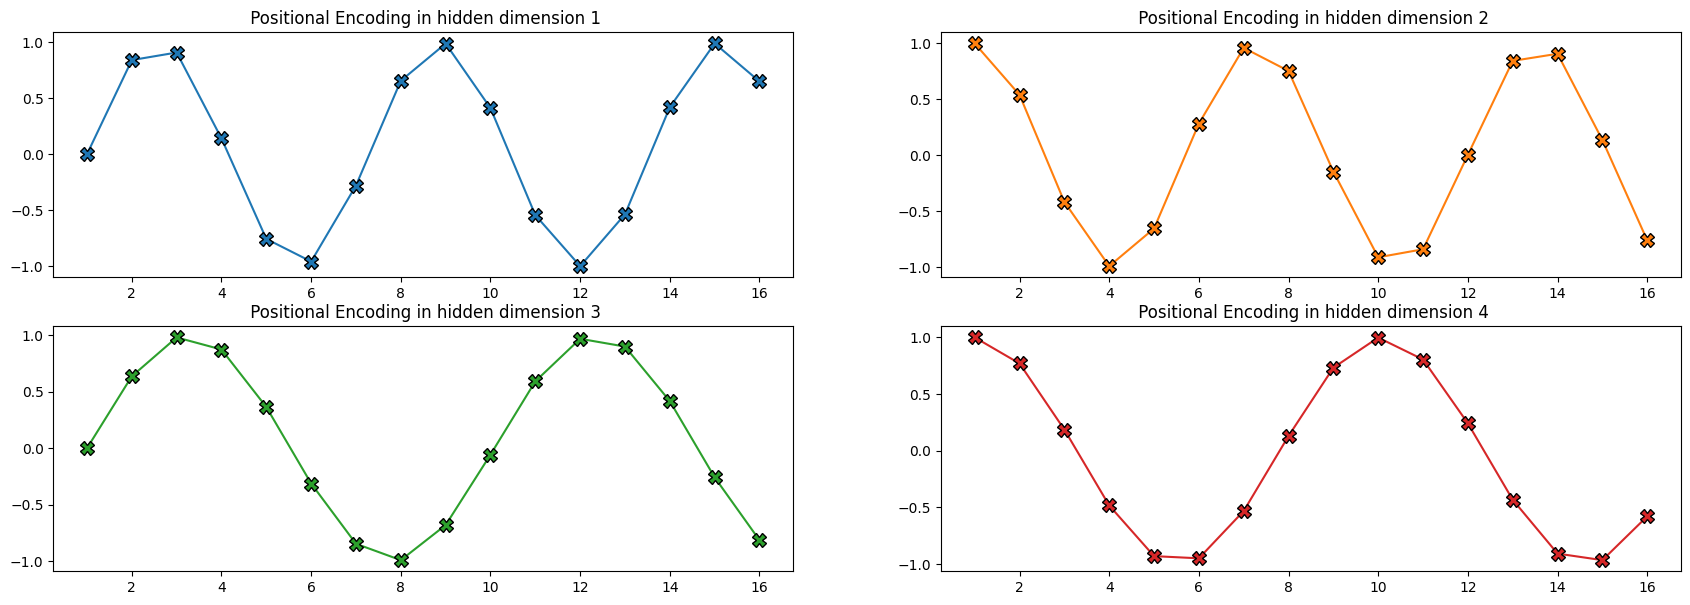

In [5]:
ig, ax = plt.subplots(2, 2, figsize=(21,7))
ax = [a for a_list in ax for a in a_list]
for i in range(len(ax)):
    ax[i].plot(np.arange(1,17), pe[i,:16], color=f'C{i}', marker="X", markersize=10,markeredgecolor='black')
    ax[i].set_title(f" Positional Encoding in hidden dimension {i+1}")